<a id='sec_Notebooks_Circ_multiqubit'></a>
# Circuitos multiqúbit 

## Índice

- **[1 - Circuitos de dos qúbits con una CNOT](#sec_Notebooks_Circ_multiqubit_1)**
    - **[1.1 - CNOT con el control abajo](#sec_Notebooks_Circ_multiqubit_1.1)**
    - **[1.2 - Con el control arriba](#sec_Notebooks_Circ_multiqubit_1.2)**
    - **[1.3 - CNOT en acción. Ejemplos](#sec_Notebooks_Circ_multiqubit_1.3)**
- **[2 - Entrelazamiento: Crear estados entrelazados con la CNOT y la $H$](#sec_Notebooks_Circ_multiqubit_2)**
- **[3 - Puerta Swap](#sec_Notebooks_Circ_multiqubit_3)**
- **[4 - Puerta CSWAP](#sec_Notebooks_Circ_multiqubit_4)**
- **[5 - CCNOT o Toffoli](#sec_Notebooks_Circ_multiqubit_5)**
- **[6 - Puerta MCX (multicontrolada X)](#sec_Notebooks_Circ_multiqubit_6)**

In [ ]:
# No olvidar que en "Google colab" hay que instalar qiskit

########################
# Instala versión 0.45.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==0.45.2 qiskit-aer qiskit-ibm-runtime ipywidgets
except ImportError:
    print("NOT in colab")

In [1]:
# Importamos las librerías y clases necesarias
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector

# Import para visualización
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

Importemos el simulador que vamos a usar en este notebook:

In [2]:
# Importamos los simuladores. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

from qiskit import Aer
U_simulator = Aer.get_backend('unitary_simulator')

<a id='sec_Notebooks_Circ_multiqubit_1'></a>
## Circuitos de dos qúbits con una CNOT  

Primero vamos a ver las matrices para la CNOT con el control abajo y arriba (en Qiskit). Después veremos varias ejecucciones de circuitos con CNOTs

<a id='sec_Notebooks_Circ_multiqubit_1.1'></a>
### CNOT con el control abajo

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


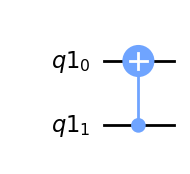

In [3]:
# Registros
quantum_reg_2_qubits = QuantumRegister(2) 

# Circuito
circuit_CNOT = QuantumCircuit(quantum_reg_2_qubits)#, classic_reg_2_bits)
# Añadimos la CNOT
circuit_CNOT.cx(1,0) #(control, target)
circuit_CNOT.draw('mpl')

In [4]:
# transpilamos
t_circuit_CNOT = transpile(circuit_CNOT, backend = U_simulator)

# Ejecutamos la simulación con 1000 shots 
result_CNOT = U_simulator.run(t_circuit_CNOT, shots = 1000).result()
matrix_CNOT = result_CNOT.get_unitary()

array_to_latex(matrix_CNOT, prefix="\\text{CNOT = }\n")

<IPython.core.display.Latex object>

<a id='sec_Notebooks_Circ_multiqubit_1.2'></a>
### Con el control arriba

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


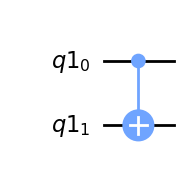

In [5]:
# Circuito
circuit_CNOT_2 = QuantumCircuit(quantum_reg_2_qubits)#, classic_reg_2_bits)
# Añadimos la CNOT
circuit_CNOT_2.cx(0,1) #(control, target)
circuit_CNOT_2.draw('mpl')

In [6]:
# transpilamos
t_circuit_CNOT_2 = transpile(circuit_CNOT_2, backend = U_simulator)

# Ejecutamos la simulación con 1000 shots 
result_CNOT_2 = U_simulator.run(t_circuit_CNOT_2, shots = 1000).result()
matrix_CNOT_2 = result_CNOT_2.get_unitary()

array_to_latex(matrix_CNOT_2, prefix="\\text{CNOT = }\n")

<IPython.core.display.Latex object>

<a id='sec_Notebooks_Circ_multiqubit_1.3'></a>
### CNOT en acción. Ejemplos

Definimos los registros

In [7]:
# Registros
quantum_reg_2_qubits = QuantumRegister(2) 

# Registros
classic_reg_2_bits = ClassicalRegister(2) 

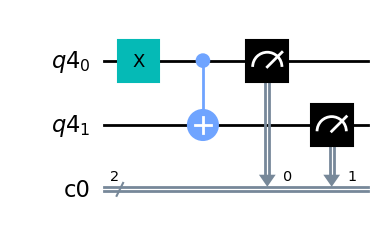

In [8]:
circuit_CNOT_3 = QuantumCircuit(quantum_reg_2_qubits, classic_reg_2_bits)

#################################
# Jugar a comentar y descomentar:
circuit_CNOT_3.x(0)
#circuit_CNOT_3.x(1)
#################################

circuit_CNOT_3.cx(0,1)
circuit_CNOT_3.measure(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_CNOT_3.draw('mpl')

In [9]:
# transpilamos
t_circuit_CNOT_3 = transpile(circuit_CNOT_3, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_CNOT_3 = simulador.run(t_circuit_CNOT_3, shots = 1000).result()

counts_CNOT_3 = result_CNOT_3.get_counts()
counts_CNOT_3

{'11': 1000}

<a id='sec_Notebooks_Circ_multiqubit_2'></a>
## Entrelazamiento: Crear estados entrelazados con la CNOT y la $H$   

Cuando aplicamos una puerta $H$ sobre un qúbit ponemos este qúbit en una superposisción de $| 0 \rangle$ y $| 1 \rangle$:
$$
H | 0 \rangle = \frac{1}{2} \left( | 0 \rangle + | 1 \rangle \right) 
$$

Si ahora pasamos este estado como **controlador** de una puerta CNOT, podemos generar un estado entrelazado. Veamos

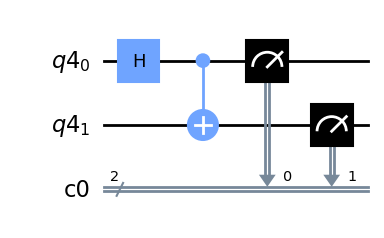

In [10]:
circuit_CNOT_H = QuantumCircuit(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_CNOT_H.h(0)
circuit_CNOT_H.cx(0,1)
circuit_CNOT_H.measure(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_CNOT_H.draw('mpl')

In [11]:
# transpilamos
t_circuit_CNOT_H = transpile(circuit_CNOT_H, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_CNOT_H = simulador.run(t_circuit_CNOT_H, shots = 1000).result()
counts_CNOT_H = result_CNOT_H.get_counts()
counts_CNOT_H

{'00': 518, '11': 482}

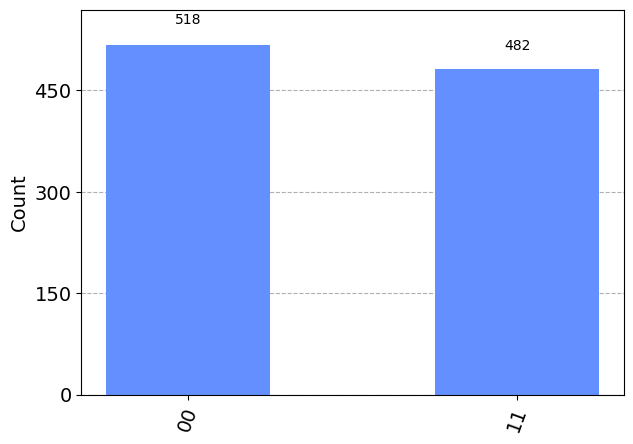

In [12]:
Fig = plot_histogram(counts_CNOT_H)
#Fig.savefig('Fig_circuit_CNOT_H_hist')
Fig

Podemos genera más estados entrelazados:

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


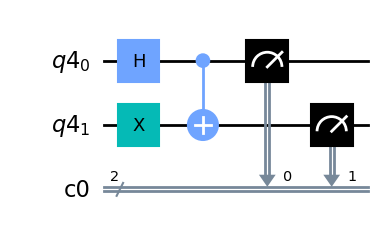

In [13]:
circuit_CNOT_H = QuantumCircuit(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_CNOT_H.h(0)
circuit_CNOT_H.x(1)
circuit_CNOT_H.cx(0,1)
circuit_CNOT_H.measure(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_CNOT_H.draw('mpl')

In [14]:
# transpilamos
t_circuit_CNOT_H = transpile(circuit_CNOT_H, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_CNOT_H = simulador.run(t_circuit_CNOT_H, shots = 1000).result()
counts_CNOT_H = result_CNOT_H.get_counts()
counts_CNOT_H

{'01': 506, '10': 494}

<a id='sec_Notebooks_Circ_multiqubit_3'></a>
## Puerta Swap   

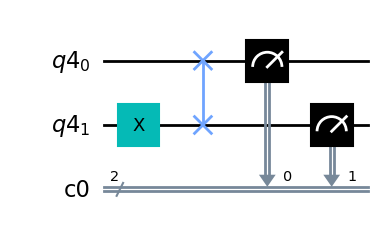

In [15]:
circuit_SWAP = QuantumCircuit(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_SWAP.x(1)
circuit_SWAP.swap(0,1)
circuit_SWAP.measure(quantum_reg_2_qubits, classic_reg_2_bits)
circuit_SWAP.draw('mpl')

In [16]:
# transpilamos
t_circuit_SWAP = transpile(circuit_SWAP, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_SWAP = simulador.run(t_circuit_SWAP, shots = 1000).result()
counts_SWAP = result_SWAP.get_counts()
counts_SWAP

{'01': 1000}

Vemos que se han invertido los estados

<a id='sec_Notebooks_Circ_multiqubit_4'></a>
## Puerta CSWAP   

En este ejemplo también vemos que no es necesario que haya los mismos qúbits en registro cuántico que en el clásico. Además, si queremos podemos medir solo unos cuantos qúbit, no todo

In [17]:
# Registros
quantum_reg_3_qubits = QuantumRegister(3) 

# Registros
classic_reg_2_bits = ClassicalRegister(2) 

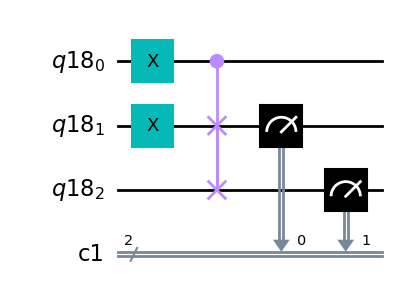

In [18]:
circuit_CSWAP = QuantumCircuit(quantum_reg_3_qubits, classic_reg_2_bits)

#################################
# Jugar a comentar y descomentar:
circuit_CSWAP.x(0)
#################################

circuit_CSWAP.x(1)
circuit_CSWAP.cswap(0,1,2)
circuit_CSWAP.measure(quantum_reg_3_qubits[1:], classic_reg_2_bits)
circuit_CSWAP.draw('mpl')

In [19]:
# transpilamos
t_circuit_CSWAP = transpile(circuit_CSWAP, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_CSWAP = simulador.run(t_circuit_CSWAP, shots = 1000).result()
counts_CSWAP = result_CSWAP.get_counts()
counts_CSWAP

{'10': 1000}

<a id='sec_Notebooks_Circ_multiqubit_5'></a>
## CCNOT o Toffoli   

In [20]:
# Registros
quantum_reg_3_qubits = QuantumRegister(3) 

# Registros
classic_reg_3_bits = ClassicalRegister(3) 

/tmp/ipykernel_1550307/2537261642.py:9: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.toffoli()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.ccx as direct replacement.
  circuit_tof.toffoli(0,1,2)


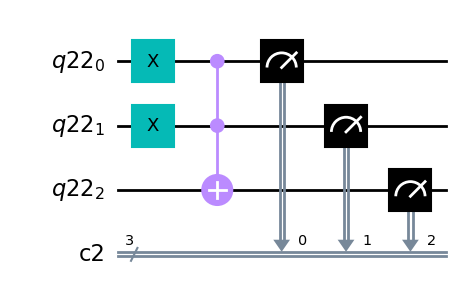

In [21]:
circuit_tof = QuantumCircuit(quantum_reg_3_qubits, classic_reg_3_bits)

#################################
# Jugar a comentar y descomentar una o varias lias:
circuit_tof.x(0)
circuit_tof.x(1)
#################################

circuit_tof.toffoli(0,1,2)
circuit_tof.measure(quantum_reg_3_qubits, classic_reg_3_bits)
circuit_tof.draw('mpl')

In [22]:
# transpilamos
t_circuit_tof = transpile(circuit_tof, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_tof = simulador.run(t_circuit_tof, shots = 1000).result()
counts_tof = result_tof.get_counts()
counts_tof

{'111': 1000}

<a id='sec_Notebooks_Circ_multiqubit_6'></a>
## Puerta MCX (multicontrolada X)  

In [23]:
# Registros
control_reg = QuantumRegister(4) 
target_qubit = QuantumRegister(1)

# Registros
classic_reg_1_bits = ClassicalRegister(1) 

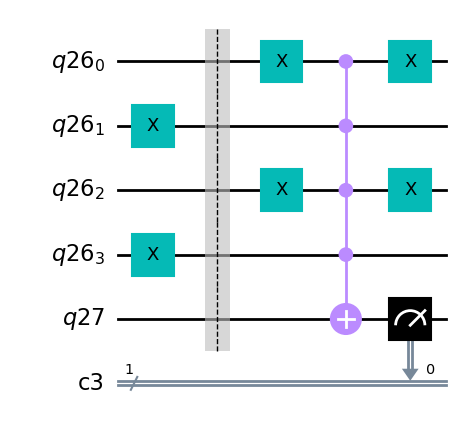

In [24]:
circuit_mcx = QuantumCircuit(control_reg, target_qubit, classic_reg_1_bits)

#################################
# Jugar a comentar y descomentar una o varias lias:
# Inicializacion

#circuit_mcx.x(control_reg[0])
circuit_mcx.x(control_reg[1])
#circuit_mcx.x(control_reg[2])
circuit_mcx.x(control_reg[3])
#################################


circuit_mcx.barrier()


#################################
# Jugar a comentar y descomentar una o varias lias:
# Respetar que en un mismo qubit debe de haber o 
# ninguna X o una antes y otra despues de la mcx

circuit_mcx.x(control_reg[0])
#circuit_mcx.x(control_reg[1])
circuit_mcx.x(control_reg[2])
#circuit_mcx.x(control_reg[3])
#################################


circuit_mcx.mcx(control_reg, target_qubit)


#################################
# Jugar a comentar y descomentar una o varias lias:
# Respetar que en un mismo qubit debe de haber o 
# ninguna X o una antes y otra despues de la mcx

circuit_mcx.x(control_reg[0])
#circuit_mcx.x(control_reg[1])
circuit_mcx.x(control_reg[2])
#circuit_mcx.x(control_reg[3])
#################################

circuit_mcx.measure(target_qubit, classic_reg_1_bits)
circuit_mcx.draw('mpl')

In [25]:
# transpilamos
t_circuit_mcx = transpile(circuit_mcx, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_mcx = simulador.run(t_circuit_mcx, shots = 1000).result()
counts_mcx = result_mcx.get_counts()
counts_mcx

{'1': 1000}

In [26]:
import qiskit.tools.jupyter
%qiskit_version_table